## <center> Medical Insurance Cost Estimation Using Machine Learning </center>

Dataset that contains details about the background of a person who is purchasing medical insurance along with what amount of premium is charged to those individuals

| Column    | Description                                                                 |
|-----------|-----------------------------------------------------------------------------|
| age       | Age of the individual in years.                                             |
| sex       | Gender of the individual (male or female).                                 |
| bmi       | Body Mass Index — a measure of body fat based on height and weight.        |
| children  | Number of dependent children covered by the insurance.                     |
| smoker    | Indicates whether the individual smokes (yes or no).                       |
| region    | Geographic region in the U.S. where the individual resides.                |
| charges   | Medical insurance cost billed to the individual (in USD).                  |


Insurance Dataset for Predicting Health Insurance Premiums in the US" is a collection of data on various factors that can influence medical costs and premiums for health insurance in the United States.

## Machine Learning Feature and Target Definition

###  Target Variable (What we're predicting)
- `charges`: The medical insurance cost billed to an individual (in USD).

###  Feature Variables (Inputs used for prediction)
- `age`: Age of the individual (in years).
- `sex`: Gender of the individual (`male` or `female`).
- `bmi`: Body Mass Index — indicator of health status.
- `children`: Number of children/dependents covered by insurance.
- `smoker`: Whether the person smokes (`yes` or `no`).
- `region`: U.S. geographic region where the person resides.



## All libraries require for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

## Importing data set and checking first 5 rows 

In [2]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

-  This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- there are no null values in the dataset given.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- From the above, we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## <center> Exploratory Data Analysis

### Gender Composition of Insurance Applicants

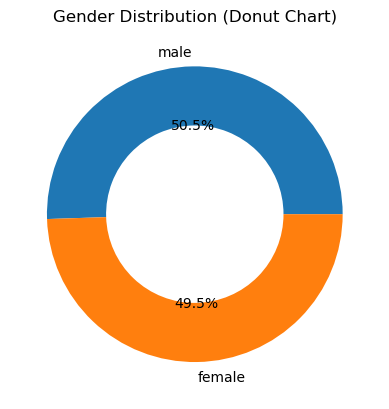

In [17]:
x = df['sex'].value_counts()
plt.pie(x.values, labels=x.index, autopct='%1.1f%%', wedgeprops={'width':0.4})
plt.title('Gender Distribution (Donut Chart)')
plt.show()


### Distribution of Smokers in the Dataset

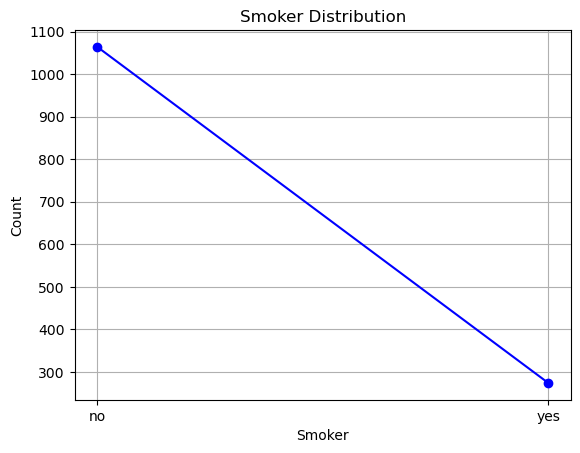

In [10]:
import matplotlib.pyplot as plt
y = df['smoker'].value_counts()
plt.plot(y.index, y.values, marker='o', linestyle='-', color='blue')
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Percentage of Customers Across Different Regions

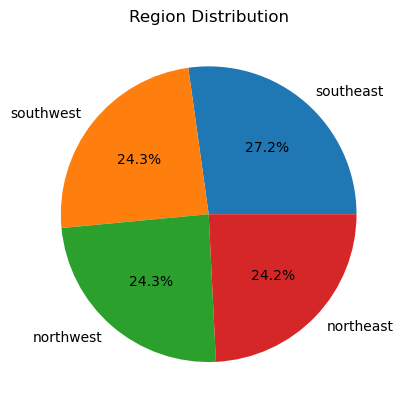

In [9]:
z=df['region'].value_counts()
plt.pie(z.values,labels=z.index,autopct='%1.1f%%')
plt.title('Region Distribution')
plt.show()

### Distribution of Policyholders by Region

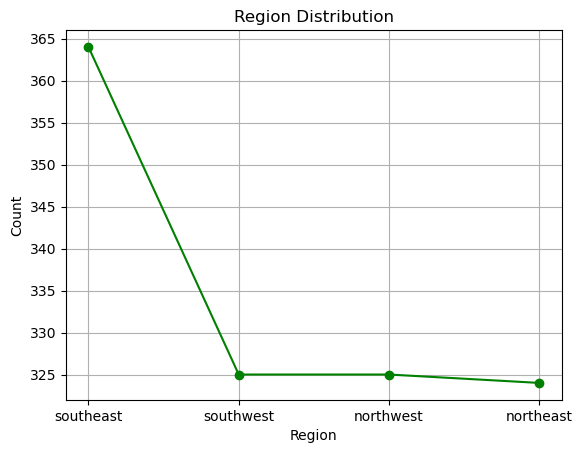

In [9]:
import matplotlib.pyplot as plt

z = df['region'].value_counts()

plt.plot(z.index, z.values, marker='o', linestyle='-', color='green')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### Average Insurance Charges by Region

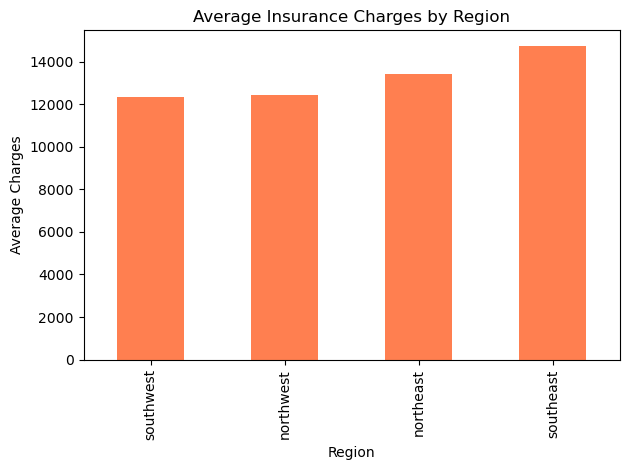

In [11]:
region_avg = df.groupby('region')['charges'].mean().sort_values()

region_avg.plot(kind='bar', color='coral')
plt.title('Average Insurance Charges by Region')
plt.ylabel('Average Charges')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


### Compares the number of male and female individuals across regions.

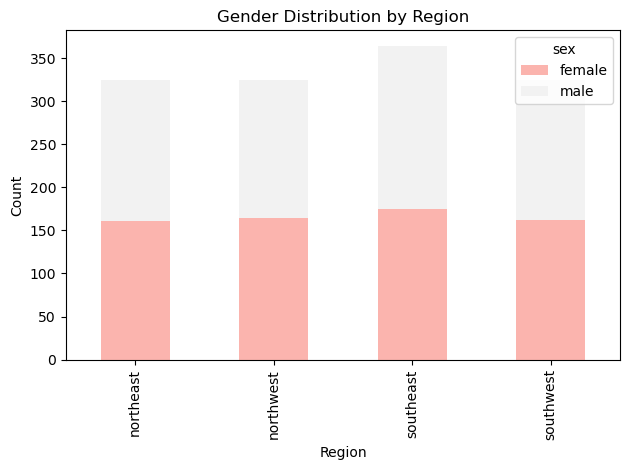

In [13]:
region_gender = df.groupby(['region', 'sex']).size().unstack()
region_gender.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Gender Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


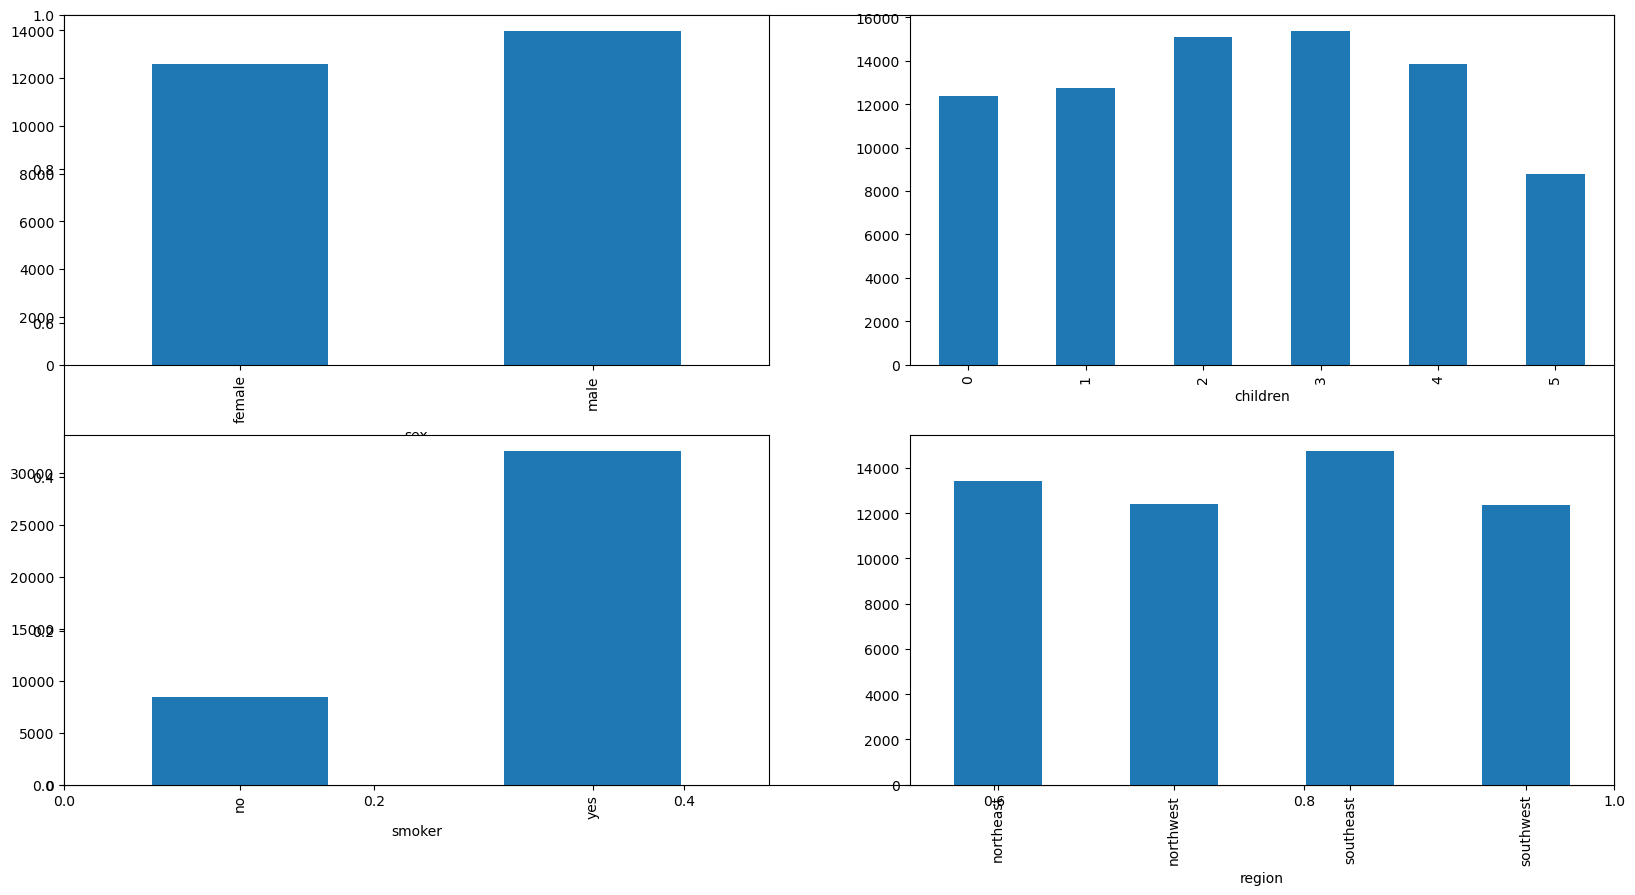

In [10]:
features = ['sex', 'children', 'smoker', 'region']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

- Charges are on the higher side for males as compared to females but the difference is not that much.
- Premium charged from the smoker is around thrice that which is charged from non-smokers.
- Charges are approximately the same in the given four regions.

### Scatter plot of BMI vs Charges

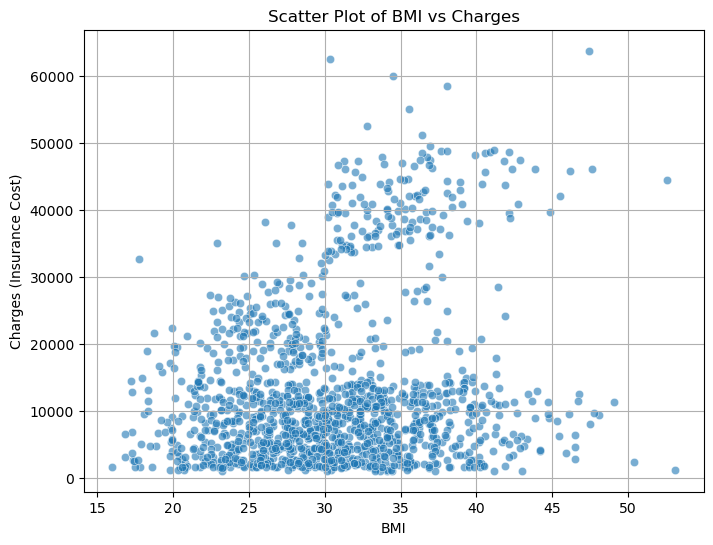

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['bmi'], df['charges'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges (Insurance Cost)')
plt.grid(True)
plt.show()

In [12]:
import seaborn as sns

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(1337, 7)

<Axes: ylabel='age'>

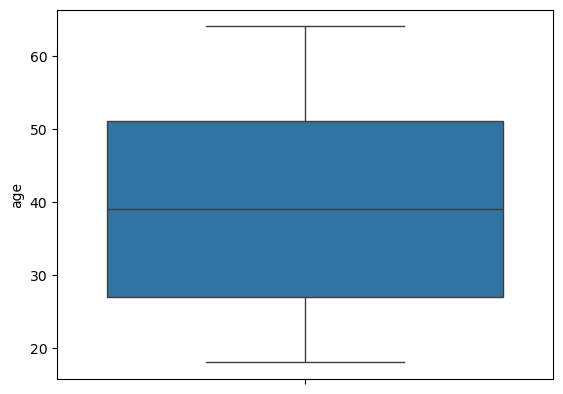

In [15]:
sns.boxplot(df['age'])

- we can see that there are no outliers present in age column

<Axes: ylabel='bmi'>

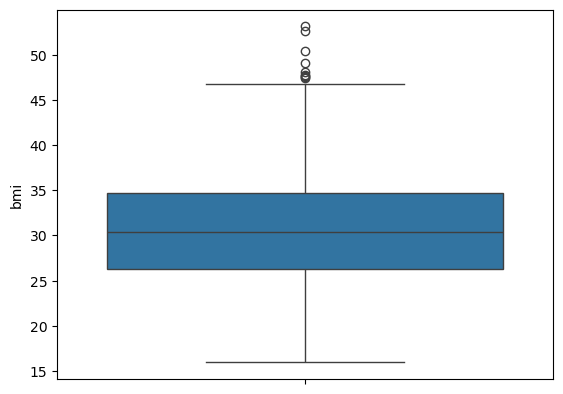

In [16]:
sns.boxplot(df['bmi'])

- Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [17]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


<Axes: ylabel='bmi'>

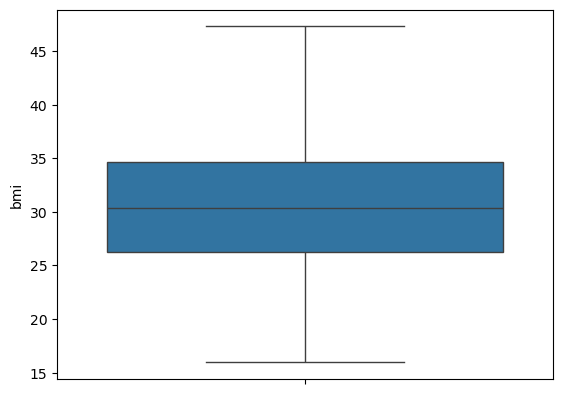

In [19]:
# Apply capping
df['bmi'] = df['bmi'].clip(lower=lowlim, upper=upplim)
sns.boxplot(df['bmi'])

In [20]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


- we successfully treated the outliers .

### <center> Encoding

#### encoding is to be done for discrete categorical data (sex,bmi,region).

- df['sex']=df['sex'].map({'male':1,'female':0})
- df['smoker']=df['smoker'].map({'yes':1,'no':0})
- df['region']=df['region'].map({'northwest':1, 'northeast':0,'southeast':2,'southwest':3})

In [21]:
label_enc=LabelEncoder()
df['sex']=label_enc.fit_transform(df['sex'])
## Female-0 and Male-1

In [22]:
df['smoker']=label_enc.fit_transform(df['smoker'])
## yes-1 and no-0

In [23]:
df['region']=label_enc.fit_transform(df['region'])
## SouthWest-3,Southeast-2,NorthWest-1,NorthEast-0

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


- The discrete data is encoded and the data preprocessing and data wrangling part is completed.Now we can go for model development.

## Corelation HeatMap

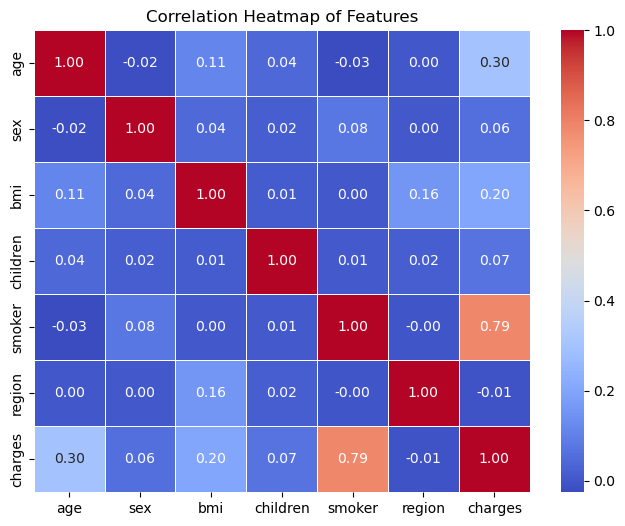

In [25]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

### <center> Model Development

In [26]:
X=df.drop(['charges'],axis=1)
y=df['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_test

,age,sex,bmi,children,smoker,region
900,49,1,22.515,0,0,0
1064,29,0,25.600,4,0,3
1256,51,0,36.385,3,0,1
298,31,1,34.390,3,1,1
237,31,1,38.390,2,0,2
...,...,...,...,...,...,...
534,64,1,40.480,0,0,2
542,63,0,36.300,0,0,2
760,22,0,34.580,2,0,0
1284,61,1,36.300,1,1,3


In [28]:
len(X_train)

1069

In [29]:
len(X_test)

268

### linear Regression

In [30]:
model_linear=LinearRegression()
model_linear.fit(X_train,y_train)
print(model_linear.score(X_test,y_test))
print(model_linear.score(X_train,y_train))
print(cross_val_score(model_linear,X,y,cv=5,).mean())

0.8069852180198289
0.7298127441752071
0.7472330007362453


### Random Forest Regression

In [31]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(X_train,y_train)
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)
print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print(cross_val_score(rfmodel,X,y,cv=5,).mean())

0.9735867068537906
0.8834744730239932
0.8349859197116537


#### Hyperparametertuning

In [32]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'n_estimators': 150}


#### After Hypertuning import the parameters

In [33]:
rfmodel=RandomForestRegressor(random_state=42,n_estimators=150)
rfmodel.fit(X_train,y_train)
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)
print(r2_score(y_train,ypredtrain2))
print(r2_score(y_test,ypredtest2))
print(cross_val_score(rfmodel,X,y,cv=5,).mean())

0.9750444859302699
0.8833846725542798
0.8364732261316407


### DecisionTree Regression

In [34]:
model_Decision_tree = DecisionTreeRegressor()
model_Decision_tree.fit(X_train,y_train)
print(model_Decision_tree.score(X_test,y_test))
print(model_Decision_tree.score(X_train,y_train))
print(cross_val_score(model_Decision_tree,X,y,cv=5,).mean())

0.7710550272597814
1.0
0.7142699930934284


### Support Vector Regression

In [35]:
model_svc=SVR(gamma='auto',C=10,kernel='linear')
model_svc.fit(X_train,y_train)
print(model_svc.score(X_test,y_test))
print(model_svc.score(X_train,y_train))
print(cross_val_score(model_svc,X,y,cv=5).mean())

-0.020189301473316323
-0.015684353811884932
-0.006752477522984602


### GradientBoostingRegressiom

In [36]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(X_train,y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(gbmodel,X,y,cv=5,).mean())

0.8943206659773493
0.9019592266883302
0.855613072490916


#### Hyperparametertuning

In [37]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.19, 'n_estimators': 19}


#### After Hypertuning import the parameters

In [38]:
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.19)
gbmodel.fit(X_train,y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(gbmodel,X,y,cv=5,).mean())

0.866865030742596
0.9015470919328216
0.860019091980939


# Model Comparison

| Model                | Train Accuracy | Test Accuracy | CV Score |
|---------------------|----------------|---------------|----------|
| Linear Regression    | 0.729          | 0.806         | 0.747    |
| Support Vector Machine | -0.101        | -0.134        | 0.103    |
| Random Forest        | 0.974          | 0.882         | 0.836    |
| Gradient Boost       | 0.866         | 0.901         | 0.860    |
| Decision Tree        |1.0             | 0.772         | 0.704    |


## From the above table we can observe that Gradient Boost is the best model.

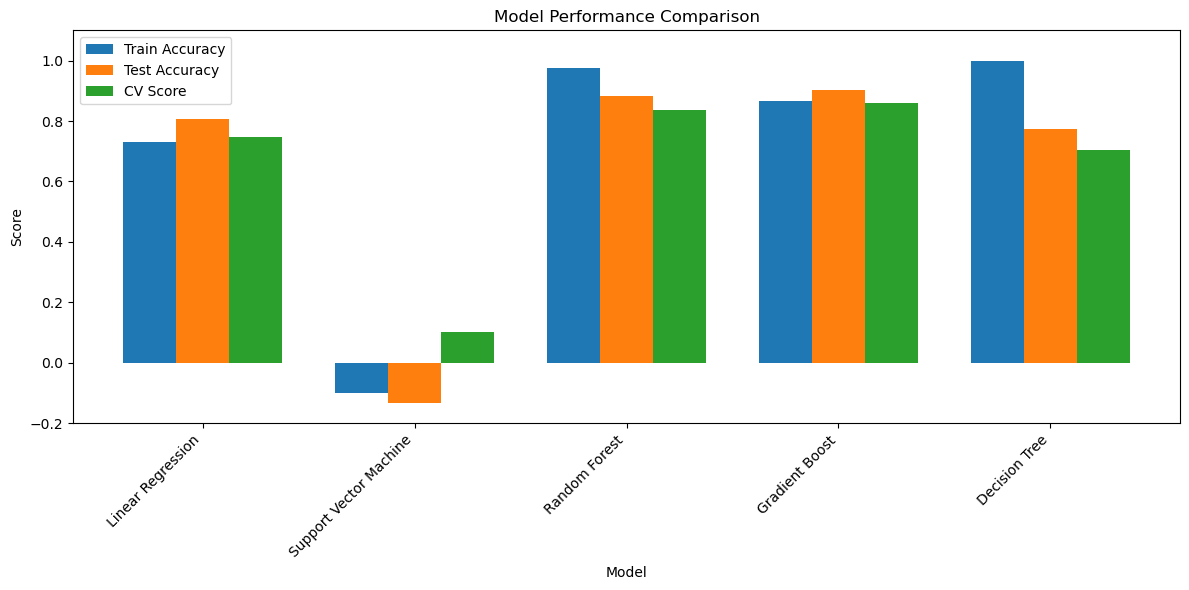

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = [
    "Linear Regression", "Support Vector Machine", "Random Forest",
    "Gradient Boost", "Decision Tree"
]
train_acc = [0.729, -0.101, 0.974, 0.866, 1.0]
test_acc = [0.806, -0.134, 0.882, 0.901, 0.772]
cv_score = [0.747, 0.103, 0.836, 0.860, 0.704]

# Create DataFrame
df = pd.DataFrame({
    "Model": models,
    "Train Accuracy": train_acc,
    "Test Accuracy": test_acc,
    "CV Score": cv_score
})

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.25
x = range(len(models))

plt.bar([p - bar_width for p in x], df["Train Accuracy"], width=bar_width, label="Train Accuracy")
plt.bar(x, df["Test Accuracy"], width=bar_width, label="Test Accuracy")
plt.bar([p + bar_width for p in x], df["CV Score"], width=bar_width, label="CV Score")

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(ticks=x, labels=models, rotation=45, ha='right')
plt.ylim(-0.2, 1.1)
plt.legend()
plt.tight_layout()

plt.show()


- #### Out of all the models GradientBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.